# I. Perkenalan

Selamat datang pada pengerjaan Milestone 2 fase 2 oleh Haidar Farras Latief. 
<br>
Disarankan untuk menggunakan google colab untuk menjalankan file ipynb ini.

## 1.1 Identitas

Tugas ini dikerjakan oleh: Haidar Farras Latief

Kelas: FTDS - HCK - 002

Tanggal Pengumpulan Tugas: 12 Desember 2022

## 1.2 Masalah Utama

Pengerjaan ini digunakan untuk menyelesaikan tugas dan belajar membuat model CNN (Convolutional Neural Network)

## 1.3 Deskripsi Dataset

Dataset yang digunakan untuk melatih algoritma berasal dari: 
<br>
https://www.kaggle.com/datasets/utkarshsaxenadn/shoes-classification-dataset-13k-images
<br>
Nama artikel dataset: Shoes Classification Dataset | 13k Images |
<br>
Penerbit: DEEPNETS
<br>
Deskripsi yang tertera:
<br>
```
Shoes Image Classification Dataset
This is a Shoes Classification data, the data contains 5 Classes, these classes are :

Ballet Flat
Boat
Brogue
Clog
Sneaker
The data is divided into 4 Sections :

Train

This is the Training Image directory, each class is assigned with 2,000 training images.
Valid

This is the Validation Image directory, each class is assigned with 500 validation images.
Test

This is the Testing Image directory, each class is assigned with random number of images.
TFRecords : This contains the ".tfrecord" files and is futher divided into 3 Sections,

Train : All training tfrecords.
Valid : All Validation tfrecords.
Test : All Testing tfrecords.
In TFRecords all the images are resized to 256 x 256 pixels, whereas in the directories the images are in raw format i.e any kind of augmentation is not applied on them. You have the complete freedom to manipulate the images in your manner.

Thank You
```


## 1.4 Manfaat algoritma ini

Pada penggunaan model ini dalam bisnis, terdapat manfaat dari penggunaan algoritma ini, beberapanya adalah:

1. Mempercepat alur pemisahan inventori, Jika terdapat sekumpulan sepatu untuk dipilah berdasarkan jenisnya (Brogue, Boots, dll) bisa menggunakan automisasi dengan sensor visual ke sepatu-sepatunya. Namun setelah proses pemilahan yang dibantu oleh algoritma, proses pengamatan harus masih dilakukan oleh pengguna manusia. Algoritma ini dapat meningkatkan efisiensi tenaga dan ketelitian untuk proses pemilahan jemis sepatu. 

2. Menambah pengalaman Customer, Customer bisa dengan mudah mengunggah foto sepatu kedalam aplikasi dengan algoritma ini, Lalu aplikasi akan bisa memberikan rekomendasi beberapa produk yang sejenis. Contoh: seorang customer yang sedang mencari sepatu boot dapat mengunggah foto ini ke applikasi sehingga algoritma ini dapat mengenali jenis sepatu apa yang ingin dicari oleh customer. Bisa juga dilanjutkan dengan algoritma rekomendasi untuk mencari tahu ketertarikan customer yang sepatu boot.

3. Melihat trend di dunia digital, perusahaan bisa melakukan web scraping ke aplikasi-aplikasi (Sosial media, e-commerce, berita, dll) mengakses rata-rata jenis sepatu yang ditampilkan (bisa dengan konteks menjual atau menampilkan) untuk digunakan membantu keputusan bagian pemasaran pada perusahaan.

<center>Akhir Bagian 1</center>
<hr>
<hr>

# II. Import Libraries

In [ ]:
# 1 Manipulasi data
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Image Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 3. Model Training
import tensorflow_hub as hub
from keras.callbacks import EarlyStopping as ES, ModelCheckpoint as MC
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Input
from tensorflow.keras.optimizers import Adam

# 4. Model inference
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from PIL import Image
import requests
from io import BytesIO



<center>Akhir Bagian 2</center>
<hr>
<hr>

# III. Data Loading

## 3.1 Download dari kaggle

In [ ]:
!mkdir -p ~/.kaggle #bikin folder di kaggle root
!cp kaggle.json ~/.kaggle # copy paster kaggle.json ke folder kaggle 

!mkdir ./kaggle #bikin folder kaggle di lokasi sama (bukan di root)
!mv ./kaggle.json ./kaggle #move atau pindahi file kaggle.json ke folder kaggle

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json #perizinan akses, hanya pemilik file yang memiliki akses baca dan tulis ke file
!ls ~/.kaggle #cek list data yang ada di folder kaggle

kaggle.json


In [ ]:
!kaggle datasets download -d utkarshsaxenadn/shoes-classification-dataset-13k-images

 99% 274M/276M [00:01<00:00, 157MB/s]
100% 276M/276M [00:01<00:00, 156MB/s]


In [ ]:
# !unzip -q /content/shoes-classification-dataset-13k-images.zip -d dataset
!unzip -q /content/shoes-classification-dataset-13k-images.zip -d dataset

## 3.2 Memasang path

In [ ]:
main_path= '/content/dataset/Shoes Dataset'

In [ ]:
# Specify the root paths
train_path = os.path.join(main_path, 'Train')
valid_path = os.path.join(main_path, 'Valid')
test_path = os.path.join(main_path, 'Test')


train_tfr_path = os.path.join(main_path, 'TFRecords/Train')
valid_tfr_path = os.path.join(main_path, 'TFRecords/Valid')
test_tfr_path = os.path.join(main_path, 'TFRecords/Test')

In [ ]:
print('train set: \n' + '='*50)
num_train_ballet_flat= len(os.listdir(os.path.join(train_path, 'Ballet Flat')))
num_train_boat= len(os.listdir(os.path.join(train_path, 'Boat')))
num_train_brogue= len(os.listdir(os.path.join(train_path, 'Brogue')))
num_train_clog= len(os.listdir(os.path.join(train_path, 'Clog')))
num_train_sneaker= len(os.listdir(os.path.join(train_path, 'Sneaker')))

print(f'jumlah Ballet Flat= {num_train_ballet_flat}')
print(f'jumlah Boat= {num_train_boat}')
print(f'jumlah Brogue= {num_train_brogue}')
print(f'jumlah Clog= {num_train_clog}')
print(f'jumlah Sneaker= {num_train_sneaker}')

train set: 
jumlah Ballet Flat= 2000
jumlah Boat= 2000
jumlah Brogue= 2000
jumlah Clog= 2000
jumlah Sneaker= 2000


In [ ]:
print('test set: \n' + '='*50)
num_test_ballet_flat= len(os.listdir(os.path.join(test_path, 'Ballet Flat')))
num_test_boat= len(os.listdir(os.path.join(test_path, 'Boat')))
num_test_brogue= len(os.listdir(os.path.join(test_path, 'Brogue')))
num_test_clog= len(os.listdir(os.path.join(test_path, 'Clog')))
num_test_sneaker= len(os.listdir(os.path.join(test_path, 'Sneaker')))

print(f'jumlah Ballet Flat= {num_test_ballet_flat}')
print(f'jumlah Boat= {num_test_boat}')
print(f'jumlah Brogue= {num_test_brogue}')
print(f'jumlah Clog= {num_test_clog}')
print(f'jumlah Sneaker= {num_test_sneaker}')

test set: 
jumlah Ballet Flat= 97
jumlah Boat= 236
jumlah Brogue= 192
jumlah Clog= 424
jumlah Sneaker= 266


In [ ]:
print('valid set: \n' + '='*50)
num_valid_ballet_flat= len(os.listdir(os.path.join(valid_path, 'Ballet Flat')))
num_valid_boat= len(os.listdir(os.path.join(valid_path, 'Boat')))
num_valid_brogue= len(os.listdir(os.path.join(valid_path, 'Brogue')))
num_valid_clog= len(os.listdir(os.path.join(valid_path, 'Clog')))
num_valid_sneaker= len(os.listdir(os.path.join(valid_path, 'Sneaker')))

print(f'jumlah Ballet Flat= {num_valid_ballet_flat}')
print(f'jumlah Boat= {num_valid_boat}')
print(f'jumlah Brogue= {num_valid_brogue}')
print(f'jumlah Clog= {num_valid_clog}')
print(f'jumlah Sneaker= {num_valid_sneaker}')

valid set: 
jumlah Ballet Flat= 500
jumlah Boat= 500
jumlah Brogue= 500
jumlah Clog= 500
jumlah Sneaker= 500


In [ ]:
import glob

In [ ]:
train_ballet_flat = glob.glob(train_path+"/Ballet Flat/*.jpeg")
train_boat = glob.glob(train_path+"/Boat/*.jpeg")
train_brogue = glob.glob(train_path+"/Brogue/*.jpeg")
train_clog = glob.glob(train_path+"/Clog/*.jpeg")
train_sneaker = glob.glob(train_path+"/Sneaker/*.jpeg")

test_ballet_flat = glob.glob(test_path+"/Ballet Flat/*.jpeg")
test_boat = glob.glob(test_path+"/Boat/*.jpeg")
test_brogue = glob.glob(test_path+"/Brogue/*.jpeg")
test_clog = glob.glob(test_path+"/Clog/*.jpeg")
test_sneaker = glob.glob(test_path+"/Sneaker/*.jpeg")

valid_ballet_flat = glob.glob(valid_path+"/Ballet Flat/*.jpeg")
valid_boat = glob.glob(valid_path+"/Boat/*.jpeg")
valid_brogue = glob.glob(valid_path+"/Brogue/*.jpeg")
valid_clog = glob.glob(valid_path+"/Clog/*.jpeg")
valid_sneaker = glob.glob(valid_path+"/Sneaker/*.jpeg")

<center>Akhir Bagian 3</center>
<hr>
<hr>

# IV. Exploratory Data Analysis

## 4.1 Visualisasi isi dataset

### 4.1.1 membuat dataframe

In [ ]:
def create_dataframe(list_of_images):
    data = []
    for image in list_of_images:
        ##ambil nama dari file \ ke -1
        # images.append(image.split('\')[-1]) 
        # label.append(image.split('\')[-2])
        data.append((image, image.split('/')[-2]))
    return pd.DataFrame(data, columns=['images', 'label'])

train_df = create_dataframe(train_ballet_flat + train_boat + train_brogue + train_clog + train_sneaker)
train_df = train_df.sample(frac=1, random_state=114).reset_index(drop=True)

test_df = create_dataframe(test_ballet_flat + test_boat + test_brogue + test_clog + test_sneaker)
test_df = test_df.sample(frac=1, random_state=114).reset_index(drop=True)

valid_df = create_dataframe(valid_ballet_flat + valid_boat + valid_brogue + valid_clog + valid_sneaker)
valid_df = valid_df.sample(frac=1, random_state=114).reset_index(drop=True)

### 4.1.2 Melihat isi dataframe

#### 4.1.2.1 Dataframe Train

In [ ]:
print(train_df.shape)
train_df.head(7)

(9998, 2)


images        label
0  /content/dataset/Shoes Dataset/Train/Brogue/Br...       Brogue
1  /content/dataset/Shoes Dataset/Train/Ballet Fl...  Ballet Flat
2  /content/dataset/Shoes Dataset/Train/Brogue/Br...       Brogue
3  /content/dataset/Shoes Dataset/Train/Clog/Clog...         Clog
4  /content/dataset/Shoes Dataset/Train/Boat/Boat...         Boat
5  /content/dataset/Shoes Dataset/Train/Clog/Clog...         Clog
6  /content/dataset/Shoes Dataset/Train/Ballet Fl...  Ballet Flat

#### 4.1.2.2 Dataframe Test

In [ ]:
print(test_df.shape)
test_df.head(7)

(1215, 2)


images    label
0  /content/dataset/Shoes Dataset/Test/Clog/Clog-...     Clog
1  /content/dataset/Shoes Dataset/Test/Sneaker/Sn...  Sneaker
2  /content/dataset/Shoes Dataset/Test/Clog/Clog-...     Clog
3  /content/dataset/Shoes Dataset/Test/Sneaker/Sn...  Sneaker
4  /content/dataset/Shoes Dataset/Test/Brogue/Bro...   Brogue
5  /content/dataset/Shoes Dataset/Test/Clog/Clog-...     Clog
6  /content/dataset/Shoes Dataset/Test/Boat/Boat ...     Boat

#### 4.1.2.3 Dataframe Validation

In [ ]:
print(valid_df.shape)
valid_df.head(7)

(2494, 2)


images        label
0  /content/dataset/Shoes Dataset/Valid/Ballet Fl...  Ballet Flat
1  /content/dataset/Shoes Dataset/Valid/Clog/Clog...         Clog
2  /content/dataset/Shoes Dataset/Valid/Boat/Boat...         Boat
3  /content/dataset/Shoes Dataset/Valid/Boat/Boat...         Boat
4  /content/dataset/Shoes Dataset/Valid/Ballet Fl...  Ballet Flat
5  /content/dataset/Shoes Dataset/Valid/Ballet Fl...  Ballet Flat
6  /content/dataset/Shoes Dataset/Valid/Sneaker/S...      Sneaker

### 4.1.3 Melihat persebaran data

#### 4.1.3.1 Definisi fungsi

In [ ]:
def visualize_data(dataframe, label):
    fig, ax = plt.subplots(figsize =(8, 5))
    ax = sns.countplot(x='label', data=dataframe, palette='Set2')
    ax.set_title('Data Distribution')
    ax.set_xlabel('Label')
    ax.set_ylabel('Count')
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'),
                   (p.get_x() + p.get_width() / 2,
                    p.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')
    
    # Setting the label for x-axis
    plt.xlabel("Label", size=14)
    # Setting the label for y-axis
    plt.ylabel("Jumlah", size=14)
    # plt title base on name of 
    plt.title(f"{label} Distribution", size=10)
    plt.show()

#### 4.1.3.2 Visualisasi persebaran data

##### 4.1.3.2.1 Persebaran data Train

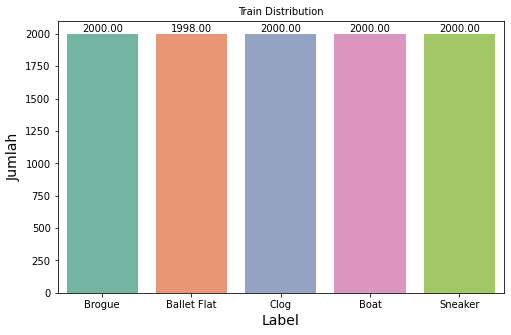

In [ ]:
visualize_data(train_df, 'Train')

##### 4.1.3.2.2 Persebaran data Test

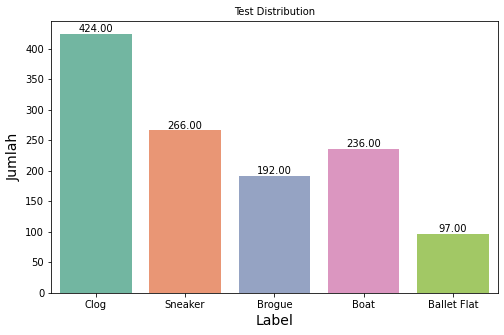

In [ ]:
visualize_data(test_df, 'Test')

##### 4.1.3.2.3 Persebaran data Validation

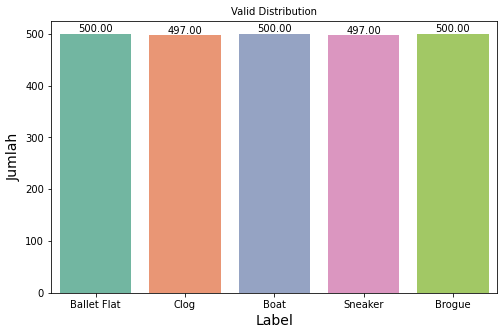

In [ ]:
visualize_data(valid_df, 'Valid')

## 4.2 Visualisasi isi dataset

### 4.2.1 Mengambil sampel

In [ ]:
import cv2

In [ ]:
# Get few samples for both the classes
train_ballet_flat_samples = (train_df[train_df['label']=="Ballet Flat"]['images'].iloc[:5]).tolist()
boat_train_samples = (train_df[train_df['label']=='Boat']['images'].iloc[:5]).tolist()
brogue_train_samples = (train_df[train_df['label']=='Brogue']['images'].iloc[:5]).tolist()
clog_train_samples = (train_df[train_df['label']=='Clog']['images'].iloc[:5]).tolist()
sneaker_train_samples = (train_df[train_df['label']=='Sneaker']['images'].iloc[:5]).tolist()

# Get few samples for both the classes
test_ballet_flat_samples = (test_df[test_df['label']=="Ballet Flat"]['images'].iloc[:5]).tolist()
boat_test_samples = (test_df[test_df['label']=='Boat']['images'].iloc[:5]).tolist()
brogue_test_samples = (test_df[test_df['label']=='Brogue']['images'].iloc[:5]).tolist()
clog_test_samples = (test_df[test_df['label']=='Clog']['images'].iloc[:5]).tolist()
sneaker_test_samples = (test_df[test_df['label']=='Sneaker']['images'].iloc[:5]).tolist()

# Get few samples for both the classes
valid_ballet_flat_samples = (valid_df[valid_df['label']=="Ballet Flat"]['images'].iloc[:5]).tolist()
boat_valid_samples = (valid_df[valid_df['label']=='Boat']['images'].iloc[:5]).tolist()
brogue_valid_samples = (valid_df[valid_df['label']=='Brogue']['images'].iloc[:5]).tolist()
clog_valid_samples = (valid_df[valid_df['label']=='Clog']['images'].iloc[:5]).tolist()
sneaker_valid_samples = (valid_df[valid_df['label']=='Sneaker']['images'].iloc[:5]).tolist()

# visualize sample images
def visualize_samples(samples):
    fig, ax = plt.subplots(nrows=5, ncols=5, figsize=(30,20))
    for i, sample in enumerate(samples):
        img = cv2.imread(sample)
        ax[i//5, i%5].set_title(sample.split('/')[-2])
        ax[i//5, i%5].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

#### 4.2.2 Visualisasi isi dataset

##### 4.2.2.1 Visualisasi data train

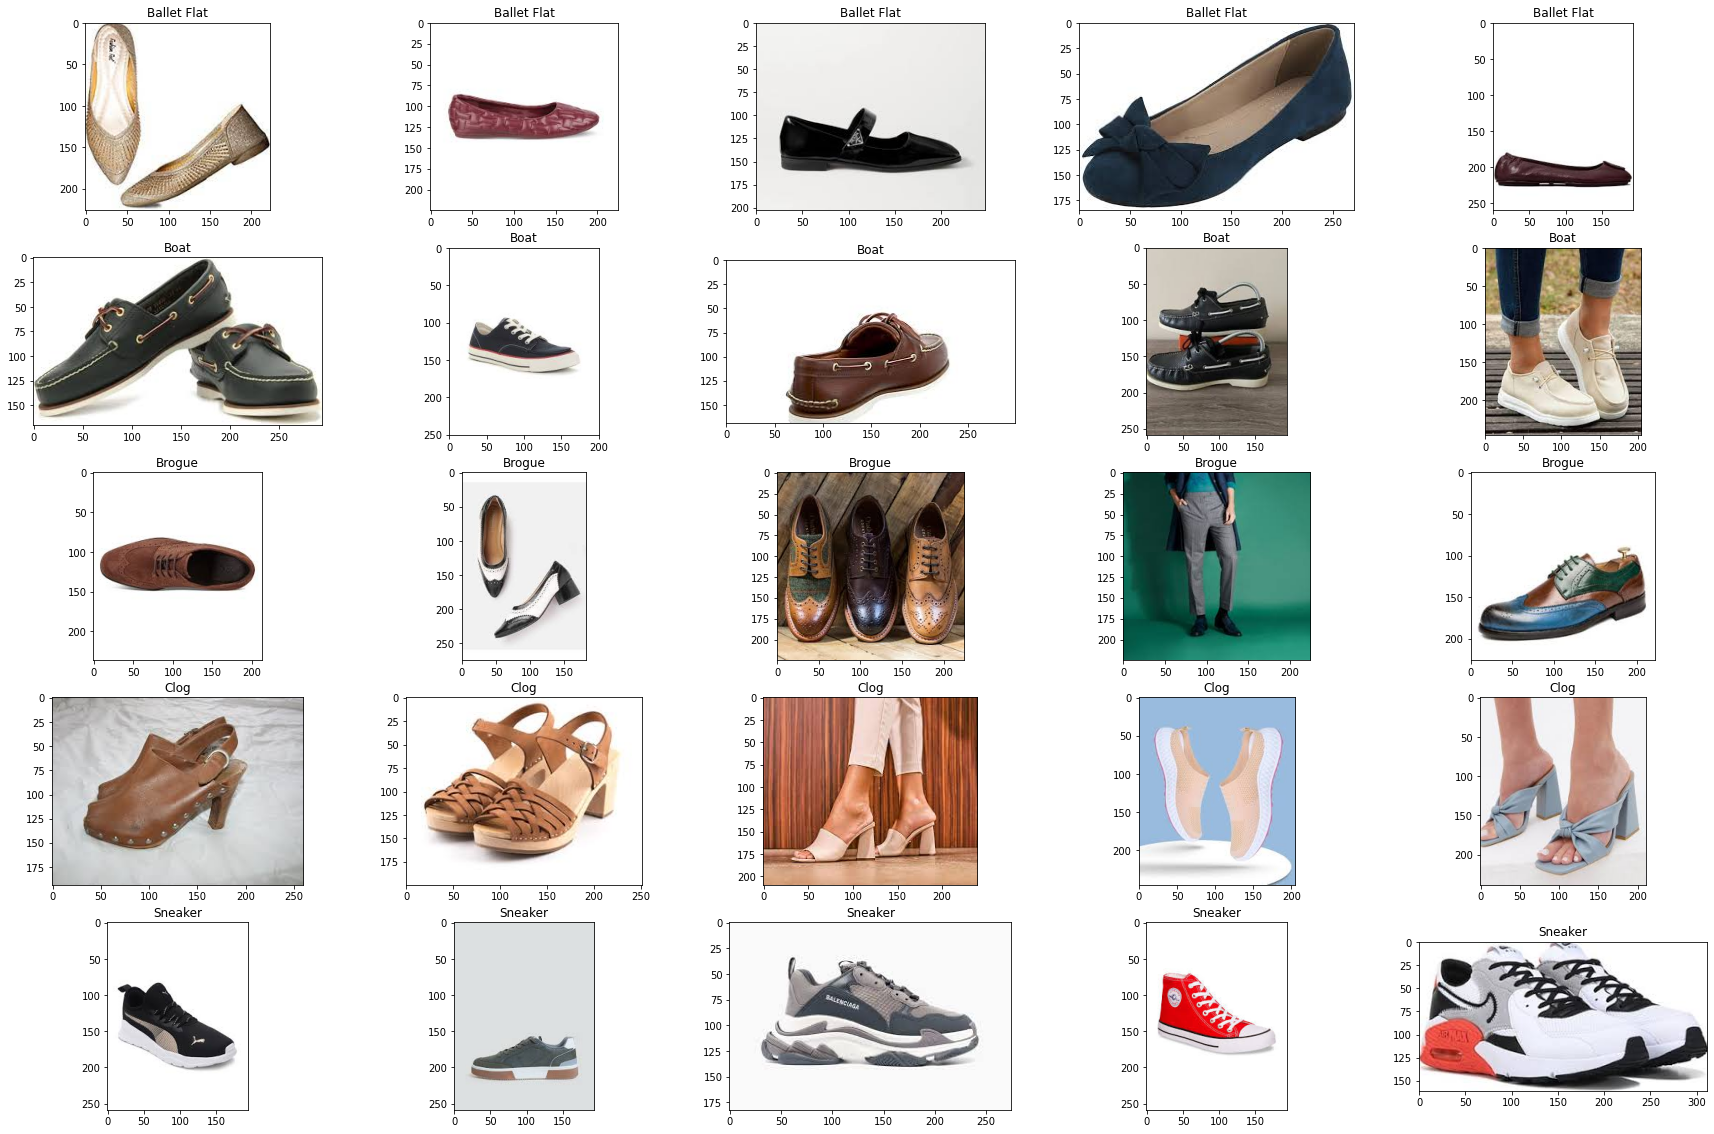

In [ ]:
visualize_samples(train_ballet_flat_samples + boat_train_samples + brogue_train_samples + clog_train_samples + sneaker_train_samples)

##### 4.2.2.2 Visualisasi data test

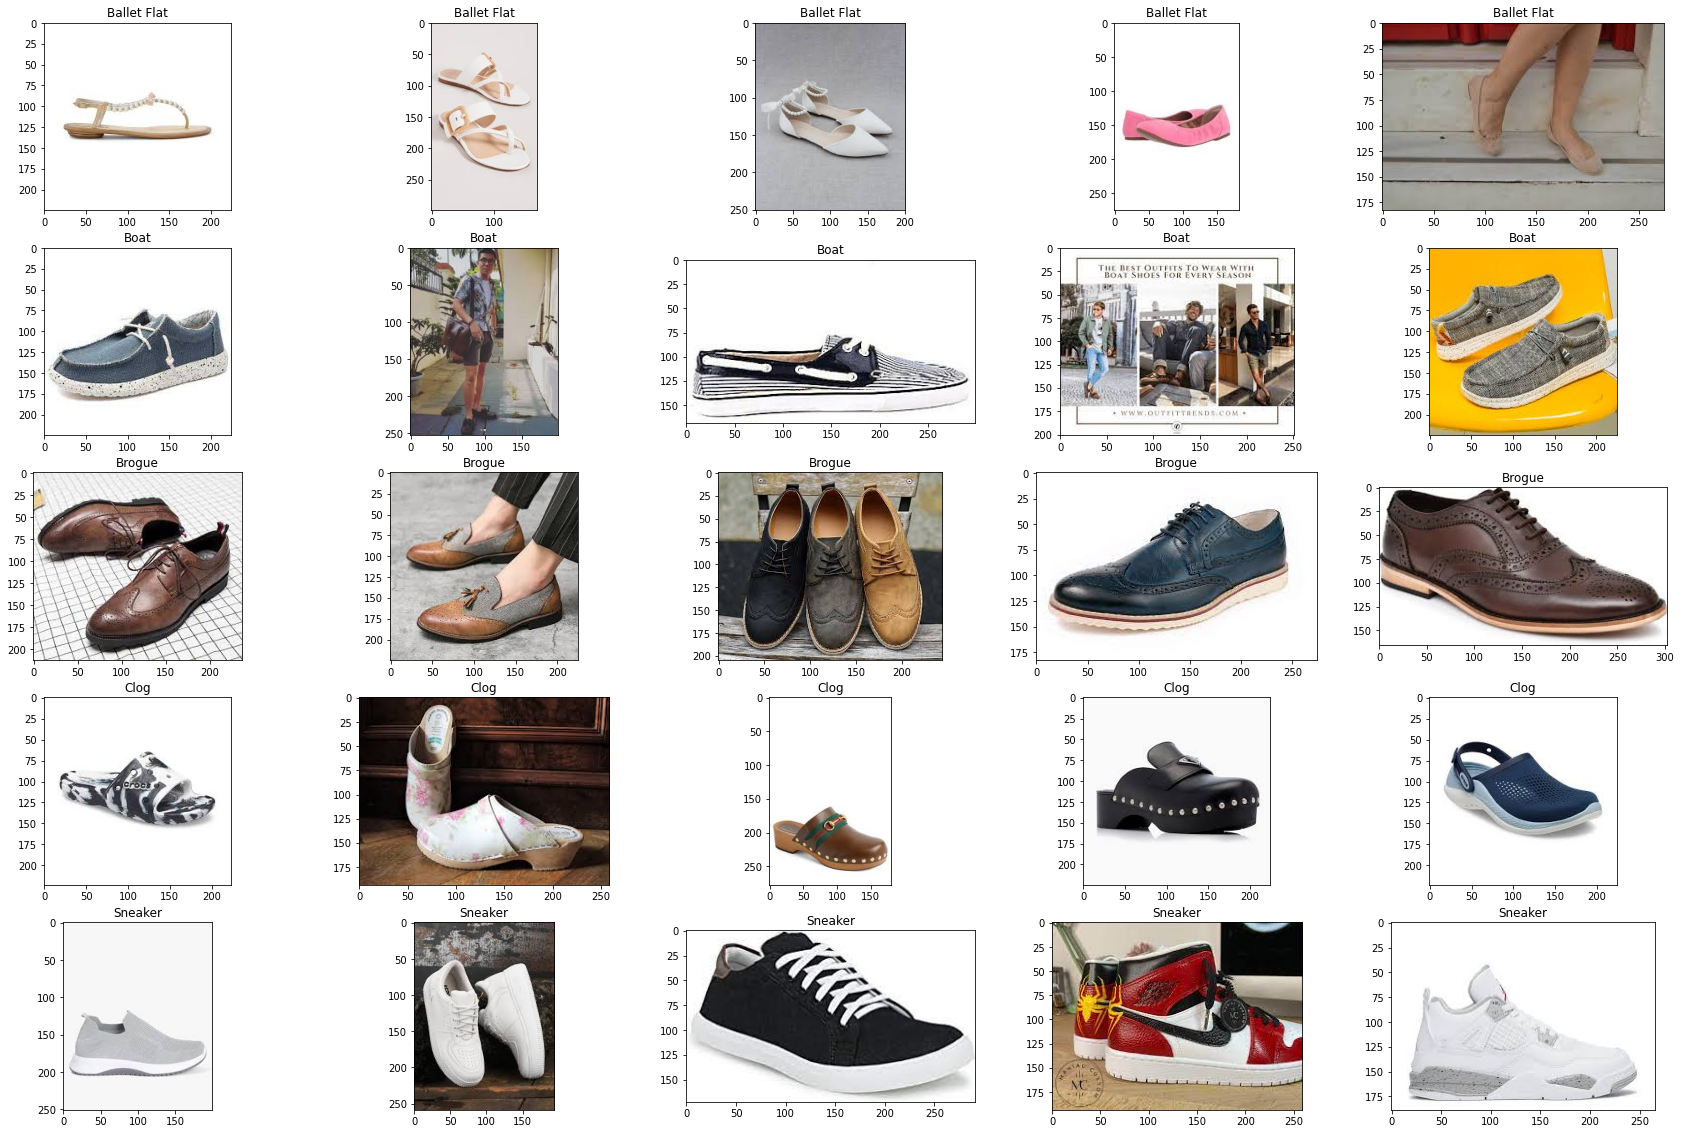

In [ ]:
visualize_samples(test_ballet_flat_samples + boat_test_samples + brogue_test_samples + clog_test_samples + sneaker_test_samples)

##### 4.2.2.3 Visualisasi data Validation

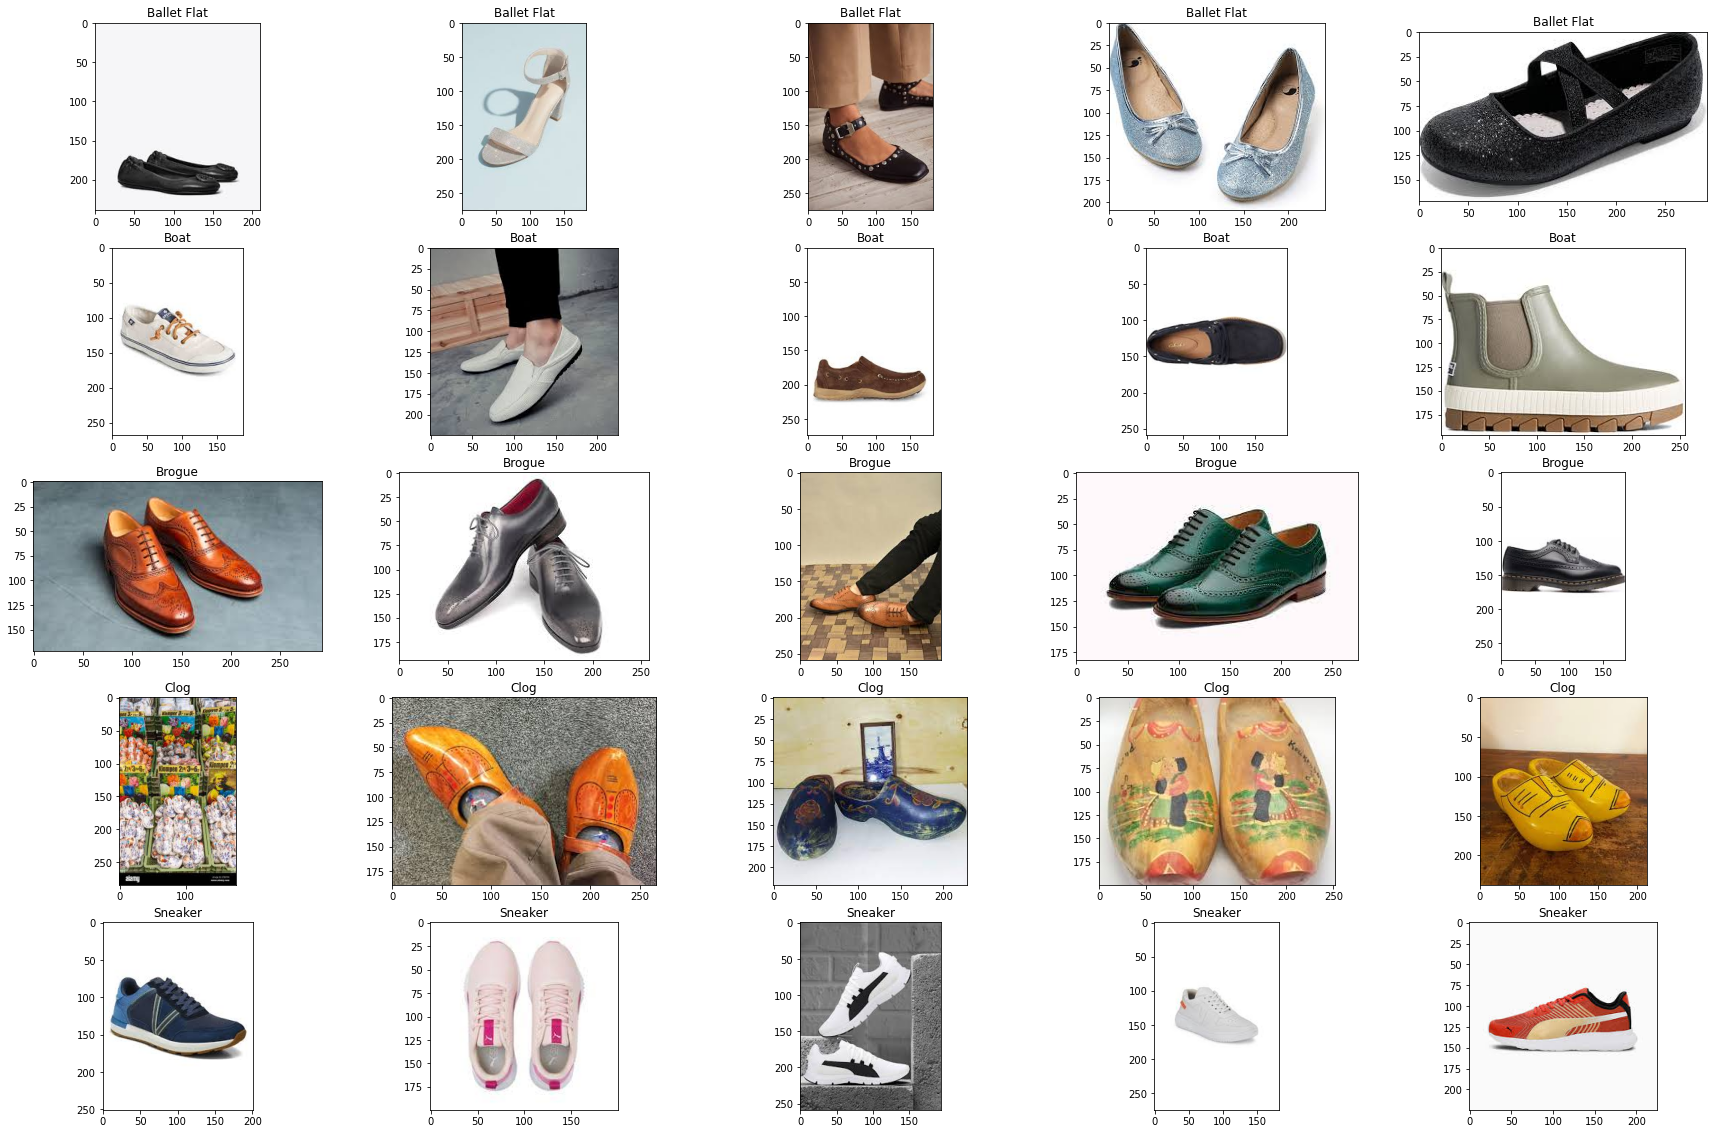

In [ ]:
visualize_samples(valid_ballet_flat_samples + boat_valid_samples + brogue_valid_samples + clog_valid_samples + sneaker_valid_samples)

## 4.3 Kesimpulan EDA (Exploration Data Analysis)

Dari hasil visualisasi foto ini menunjukan banyaknya macam sisi-sisi sepatu dan berbagai macam ukuran sepatu (ukuran dilihat dari foto). Objek selain sepatu pun juga bermacam-macam, dari yang tidak ada objek foto lain selain sepatu sampai foto yang tidak mempunyai fokus pada sepatu. Ukuran dan bentuk foto juga berbeda-beda, seperti bentuk persegi panjang horizontal maupun persegi panjang vertikal. Hal ini menjadi alasan diperlukannya proses Image Augmentation untuk memperkuat akurasi model algoritma.

In [ ]:
# Memperlihatkan nama-nama kelas yang ada di folder
class_names = sorted(os.listdir(train_path))
n_classes = len(class_names)
print(f"Number of Classes : {n_classes}\nClass Names : {class_names}")

<center>Akhir Bagian 4</center>
<hr>
<hr>

# V. Data Augmentation

In [ ]:
# Membuat generator gambar
train_datagen = ImageDataGenerator(
    rescale=1./255, #normalisasi pixel
    rotation_range=0.1,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

vaL_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Berasal dari dataframe
ds_train = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='images',
    y_col='label',
    target_size=(256, 256), # Menentukan size gambar
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=114)

ds_val = vaL_datagen.flow_from_dataframe(
    dataframe=valid_df,
    x_col='images',
    y_col='label',
    target_size=(256, 256),
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=114)

df_test = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='images',
    y_col='label',
    target_size=(256, 256),
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=114)

Found 9998 validated image filenames belonging to 5 classes.
Found 2494 validated image filenames belonging to 5 classes.
Found 1215 validated image filenames belonging to 5 classes.


Melihat angka dari target

In [ ]:
ds_train.class_indices

{'Ballet Flat': 0, 'Boat': 1, 'Brogue': 2, 'Clog': 3, 'Sneaker': 4}

<center>Akhir Bagian 5</center>
<hr>
<hr>

# VI. Model Training: Efficientnet

Pada bagian ini saya melatih algoritma dengan data yang sudah di augmentasi. Saya menggunakan transfer learning dari Efficientnet. Cara ini saya lihat dari:
<br>
https://www.kaggle.com/code/arifnver/shoes-classification-efficientnet-b7-restnetv2.
<br>
Namun, pada ipynb ini saya menguji 4 optimizer, yaitu:
1. Adam
2. RMSprop
3. Adamax
4. AdaDelta

Semua model training ini menggunakan cara Sequential.



## 6.1 Callbacks

In [ ]:
callbacks_best = [
    EarlyStopping(monitor='val_loss', 
                  patience= 2, 
                  verbose=1),
    ModelCheckpoint('best_model.hdf5',  
                    save_best_only=True)
]

### 6.2 Definelayer

In [ ]:
eff_url = "https://tfhub.dev/tensorflow/efficientnet/b7/feature-vector/1"
eff_layer = hub.KerasLayer(eff_url,
                            trainable=False,
                            input_shape=(256,256,3))

## 6.2 Model Training

### 6.2.2 Optimizer: Adam

In [ ]:
# Membuat modelling adam 
model_eff_adam=tf.keras.Sequential([
    eff_layer,
    Dense(5,
        activation="softmax")
])

In [ ]:
model_eff_adam.compile(
    optimizer='Adam', 
    loss='categorical_crossentropy', 
    metrics= ['accuracy']
    )

In [ ]:
history_model_eff_adam= model_eff_adam.fit(ds_train, 
                         batch_size= 32, 
                         epochs= 6, 
                         validation_data= ds_val,
                         callbacks= callbacks_best,
                         steps_per_epoch=len(ds_train))

Epoch 1/6
313/313 [==============================] - 157s 470ms/step - loss: 0.7601 - accuracy: 0.7360 - val_loss: 0.5805 - val_accuracy: 0.8079
Epoch 2/6
313/313 [==============================] - 143s 457ms/step - loss: 0.5873 - accuracy: 0.8002 - val_loss: 0.5411 - val_accuracy: 0.8204
Epoch 3/6
313/313 [==============================] - 143s 456ms/step - loss: 0.5329 - accuracy: 0.8226 - val_loss: 0.5148 - val_accuracy: 0.8296
Epoch 4/6
313/313 [==============================] - 143s 456ms/step - loss: 0.5028 - accuracy: 0.8278 - val_loss: 0.4830 - val_accuracy: 0.8372
Epoch 5/6
313/313 [==============================] - 141s 451ms/step - loss: 0.4771 - accuracy: 0.8435 - val_loss: 0.5047 - val_accuracy: 0.8312
Epoch 6/6
313/313 [==============================] - 142s 453ms/step - loss: 0.4589 - accuracy: 0.8509 - val_loss: 0.4823 - val_accuracy: 0.8412


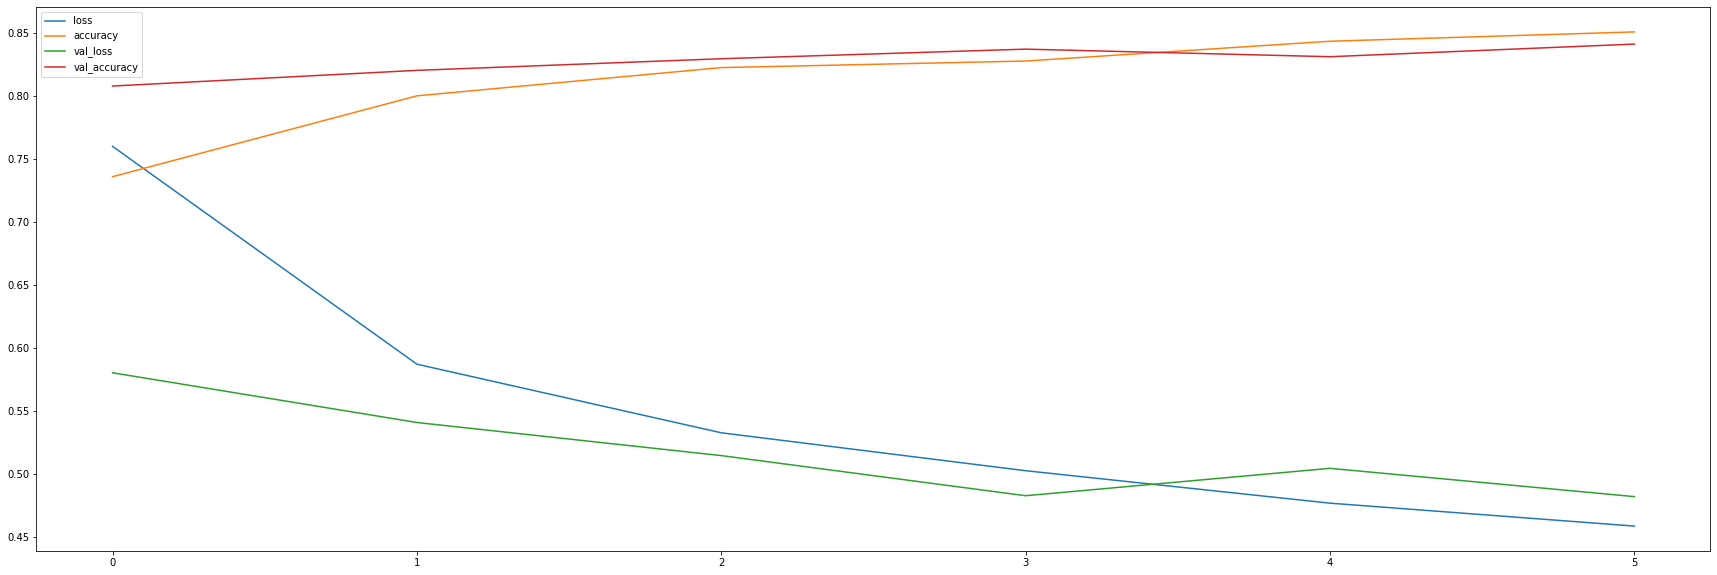

In [ ]:
# Evaluasi
pd.DataFrame(history_model_eff_adam.history).plot(figsize=(30,10))

======

### 6.1.2 Optimizer: RMSprop

In [ ]:
# Create model
model_eff_rmsp=tf.keras.Sequential([
    eff_layer,
    Dense(5,
        activation="softmax")]
)

In [ ]:
model_eff_rmsp.compile(
    optimizer='RMSprop', 
    loss='categorical_crossentropy', 
    metrics= ['accuracy']
    )

In [ ]:
history_model_eff_rmsp= model_eff_rmsp.fit(ds_train, 
                         batch_size= 32, 
                         epochs= 6, 
                         validation_data= ds_val,
                         callbacks= callbacks_best,
                         steps_per_epoch=len(ds_train))

Epoch 1/6
313/313 [==============================] - 152s 463ms/step - loss: 0.7356 - accuracy: 0.7521 - val_loss: 0.5787 - val_accuracy: 0.8007
Epoch 2/6
313/313 [==============================] - 143s 456ms/step - loss: 0.5820 - accuracy: 0.8014 - val_loss: 0.5395 - val_accuracy: 0.8200
Epoch 3/6
313/313 [==============================] - 141s 452ms/step - loss: 0.5281 - accuracy: 0.8255 - val_loss: 0.5238 - val_accuracy: 0.8280
Epoch 4/6
313/313 [==============================] - 141s 450ms/step - loss: 0.5020 - accuracy: 0.8343 - val_loss: 0.5065 - val_accuracy: 0.8284
Epoch 5/6
313/313 [==============================] - 141s 449ms/step - loss: 0.4733 - accuracy: 0.8405 - val_loss: 0.4967 - val_accuracy: 0.8376
Epoch 6/6
313/313 [==============================] - 140s 449ms/step - loss: 0.4599 - accuracy: 0.8492 - val_loss: 0.5053 - val_accuracy: 0.8336


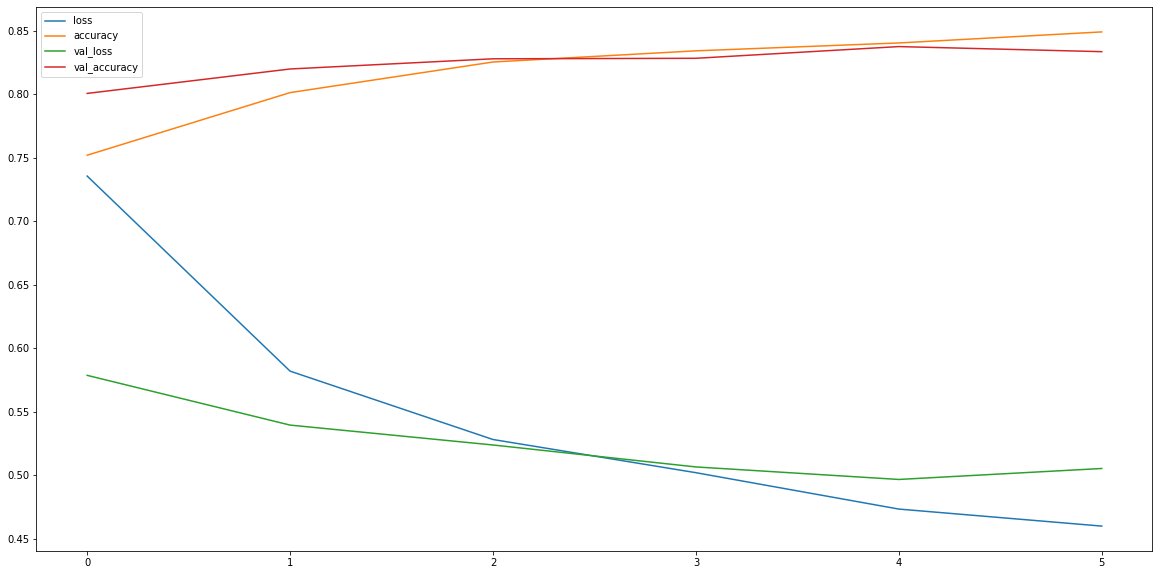

In [ ]:
# Evaluasi
pd.DataFrame(history_model_eff_rmsp.history).plot(figsize=(30,10))

### 6.1.3 Optimizer: Adamax

In [ ]:
# Membuat model Adamax
model_eff_adamax=tf.keras.Sequential([
    eff_layer,
    Dense(5,
        activation="softmax")]
)

In [ ]:
model_eff_adamax.compile(
    optimizer='Adamax', 
    loss='categorical_crossentropy', 
    metrics= ['accuracy']
    )

In [ ]:
history_model_eff_adamax= model_eff_adamax.fit(ds_train, 
                         batch_size= 32, 
                         epochs= 6, 
                         validation_data= ds_val,
                         callbacks= callbacks_best,
                         steps_per_epoch=len(ds_train))

Epoch 1/6
313/313 [==============================] - 152s 465ms/step - loss: 0.8609 - accuracy: 0.7081 - val_loss: 0.6528 - val_accuracy: 0.7803
Epoch 2/6
313/313 [==============================] - 142s 454ms/step - loss: 0.6672 - accuracy: 0.7736 - val_loss: 0.5977 - val_accuracy: 0.7967
Epoch 3/6
313/313 [==============================] - 142s 453ms/step - loss: 0.6139 - accuracy: 0.7918 - val_loss: 0.5683 - val_accuracy: 0.8059
Epoch 4/6
313/313 [==============================] - 143s 455ms/step - loss: 0.5883 - accuracy: 0.8014 - val_loss: 0.5522 - val_accuracy: 0.8111
Epoch 5/6
313/313 [==============================] - 142s 454ms/step - loss: 0.5645 - accuracy: 0.8067 - val_loss: 0.5423 - val_accuracy: 0.8160
Epoch 6/6
313/313 [==============================] - 142s 453ms/step - loss: 0.5439 - accuracy: 0.8214 - val_loss: 0.5328 - val_accuracy: 0.8172


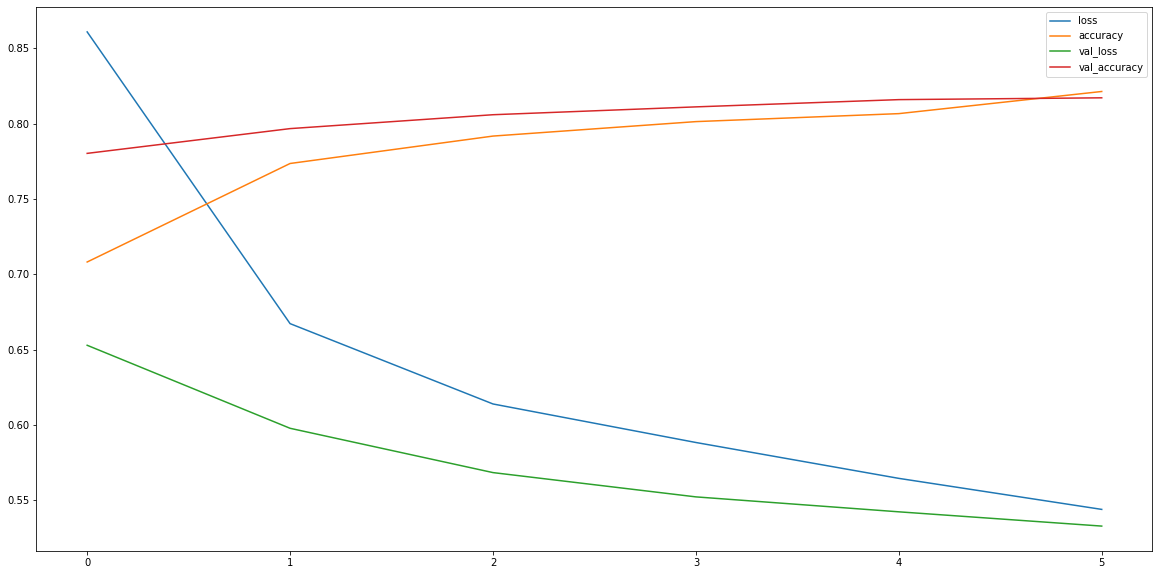

In [ ]:
# Evaluasi
pd.DataFrame(history_model_eff_adamax.history).plot(figsize=(30,10))

### 6.1.4 Optimizer: AdaDelta

In [ ]:
# Create model
model_eff_adadelta=tf.keras.Sequential([
    eff_layer,
    Dense(5,
        activation="softmax")]
)

In [ ]:
model_eff_adadelta.compile(
    optimizer='AdaDelta', 
    loss='categorical_crossentropy', 
    metrics= ['accuracy']
    )

In [ ]:
history_model_eff_adadelta= model_eff_adadelta.fit(ds_train, 
                         batch_size= 32, 
                         epochs= 6, 
                         validation_data= ds_val,
                         callbacks= callbacks_best,
                         steps_per_epoch=len(ds_train))

Epoch 1/6
313/313 [==============================] - 145s 462ms/step - loss: 1.5776 - accuracy: 0.2886 - val_loss: 1.5606 - val_accuracy: 0.2967
Epoch 2/6
313/313 [==============================] - 142s 454ms/step - loss: 1.5603 - accuracy: 0.3164 - val_loss: 1.5418 - val_accuracy: 0.3296
Epoch 3/6
313/313 [==============================] - 143s 457ms/step - loss: 1.5406 - accuracy: 0.3468 - val_loss: 1.5236 - val_accuracy: 0.3645
Epoch 4/6
313/313 [==============================] - 142s 454ms/step - loss: 1.5256 - accuracy: 0.3726 - val_loss: 1.5058 - val_accuracy: 0.3905
Epoch 5/6
313/313 [==============================] - 142s 452ms/step - loss: 1.5061 - accuracy: 0.4007 - val_loss: 1.4884 - val_accuracy: 0.4238
Epoch 6/6
313/313 [==============================] - 143s 458ms/step - loss: 1.4923 - accuracy: 0.4234 - val_loss: 1.4715 - val_accuracy: 0.4579


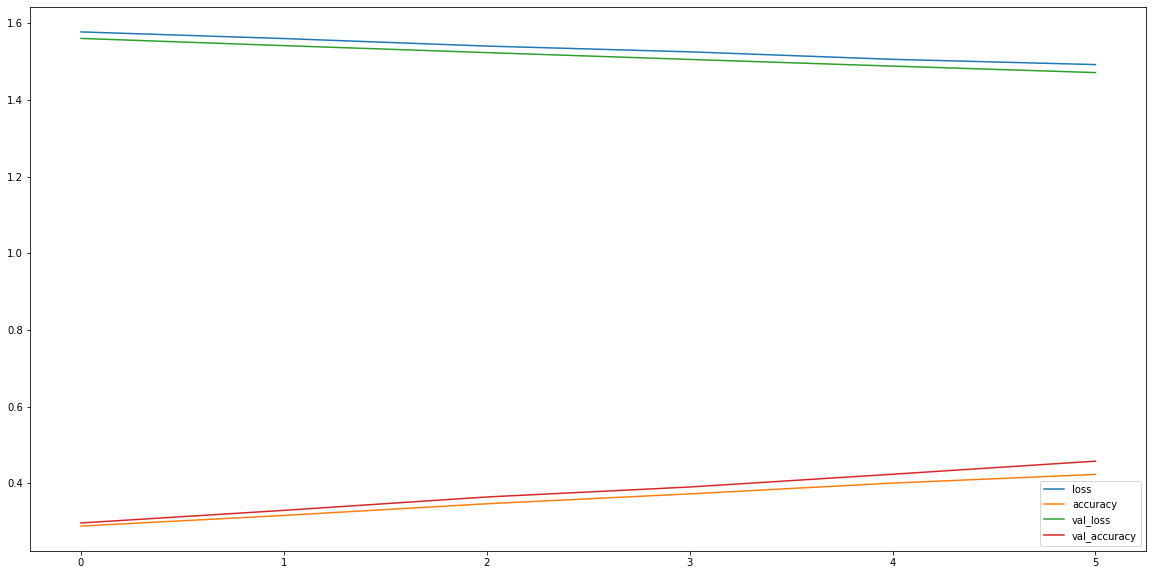

In [ ]:
# Evaluasi
pd.DataFrame(history_model_eff_adadelta.history).plot(figsize=(30,10))

## 6.2 Kesimpulan

Dari perbandingan 4 optimizer yang berbeda, dipilih optimizer Adam. Dikarenakan mempunyai gap akurasi training dengan akurasi validasi terkecil. AdaDelta mempunyai hasil terburuk.

<center>Akhir Bagian 6</center>
<hr>
<hr>

# VIII. Model Improvement

Dikarenakan optimizer Adam mendapat hasil yang bagus, saya menambahkan tuning berupa:
1. 'learning_rate' dimasukan data numerikal
2. 'beta_1' dimasukan data numerikal
3. 'beta_2' dimasukan data numerikal


In [ ]:
model_eff_adam_tnd=tf.keras.Sequential([
    eff_layer,
    Dense(5,
        activation="softmax")
])

In [ ]:
model_eff_adam_tnd.compile(
    optimizer=tf.keras.optimizers.Adam(
        # Saya menambah tuning disini
        learning_rate=0.0001,
        beta_1=0.5,
        beta_2=0.888
    ), 
    loss='categorical_crossentropy', 
    metrics= ['accuracy']
    )

In [ ]:
history_model_eff_adam_tnd= model_eff_adam.fit(ds_train, 
                         batch_size= 32, 
                         epochs= 6, 
                         validation_data= ds_val,
                         callbacks= callbacks_best,
                         steps_per_epoch=len(ds_train))

Epoch 1/6
313/313 [==============================] - 143s 455ms/step - loss: 0.4470 - accuracy: 0.8537 - val_loss: 0.4781 - val_accuracy: 0.8464
Epoch 2/6
313/313 [==============================] - 141s 451ms/step - loss: 0.4291 - accuracy: 0.8570 - val_loss: 0.4810 - val_accuracy: 0.8416
Epoch 3/6
313/313 [==============================] - 141s 451ms/step - loss: 0.4182 - accuracy: 0.8658 - val_loss: 0.4950 - val_accuracy: 0.8392
Epoch 4/6
313/313 [==============================] - 142s 454ms/step - loss: 0.4060 - accuracy: 0.8692 - val_loss: 0.4720 - val_accuracy: 0.8524
Epoch 5/6
313/313 [==============================] - 141s 452ms/step - loss: 0.4045 - accuracy: 0.8688 - val_loss: 0.4721 - val_accuracy: 0.8508
Epoch 6/6
313/313 [==============================] - 143s 457ms/step - loss: 0.3949 - accuracy: 0.8714 - val_loss: 0.4477 - val_accuracy: 0.8617


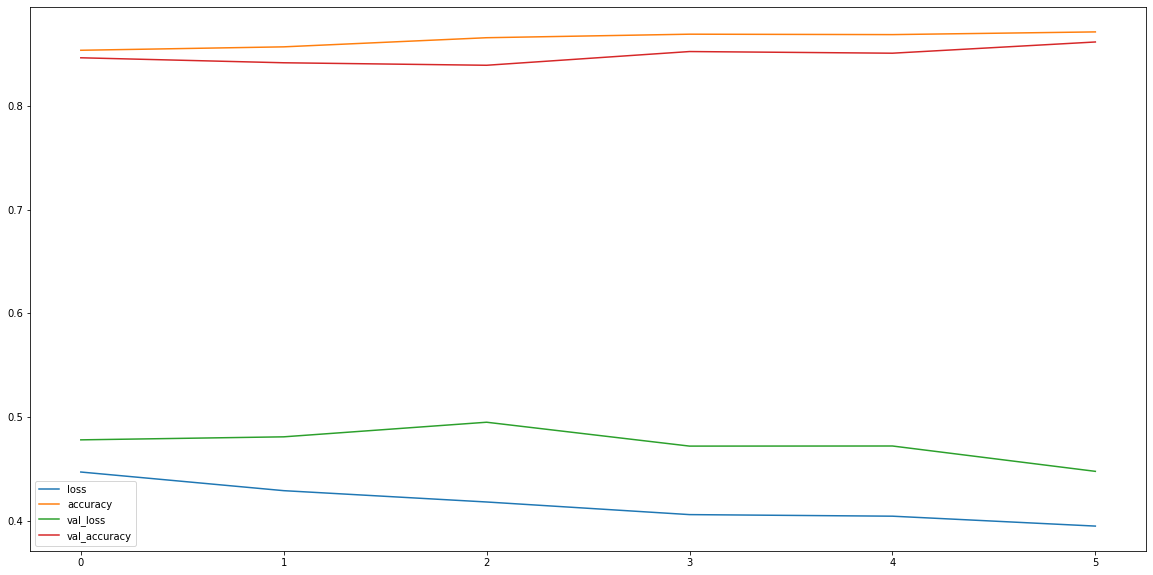

In [ ]:
pd.DataFrame(history_model_eff_adam_tnd.history).plot(figsize=(30,10))

<center>Akhir Bagian 7</center>
<hr>
<hr>

# VIII. Model Inference

## 7.1 Loading data dari Internet

In [ ]:
# Download foto dari Internet

# Alamat internet foto
url_1 = 'https://images.pexels.com/photos/167706/pexels-photo-167706.jpeg'
# Mengambil foto
response_1 = requests.get(url_1)
image_1 = Image.open(BytesIO(response_1.content))
# Menyimpan sebagai jpeg
image_1.save('/content/image_inf_1.jpeg')

url_2 = 'https://images.pexels.com/photos/1467574/pexels-photo-1467574.jpeg'
response_2 = requests.get(url_2)
image_2 = Image.open(BytesIO(response_2.content))
image_2.save('/content/image_inf_2.jpeg')

url_3 = 'https://images.pexels.com/photos/786003/pexels-photo-786003.jpeg'
response_3 = requests.get(url_3)
image_3 = Image.open(BytesIO(response_3.content))
image_3.save('/content/image_inf_3.jpeg')

url_4 = 'https://images.pexels.com/photos/2272752/pexels-photo-2272752.jpeg'
response_4 = requests.get(url_4)
image_4 = Image.open(BytesIO(response_4.content))
image_4.save('/content/image_inf_4.jpeg')

url_5 = 'https://images.pexels.com/photos/6387628/pexels-photo-6387628.jpeg'
response_5 = requests.get(url_5)
image_5 = Image.open(BytesIO(response_5.content))
image_5.save('/content/image_inf_5.jpeg')

url_6 = 'https://images.pexels.com/photos/4277934/pexels-photo-4277934.jpeg'
response_6 = requests.get(url_6)
image_6 = Image.open(BytesIO(response_6.content))
image_6.save('/content/image_inf_6.jpeg')

url_7 = 'https://images.pexels.com/photos/4654784/pexels-photo-4654784.jpeg'
response_7 = requests.get(url_7)
image_7 = Image.open(BytesIO(response_7.content))
image_7.save('/content/image_inf_7.jpeg')

{'Ballet Flat': 0, 'Boat': 1, 'Brogue': 2, 'Clog': 3, 'Sneaker': 4}

## 7.2 Prediksi data Inference

Pada bagian prediksi ini saya memakai model efficientnet dengan optimizer Adam tanpa tuning diakrenakan ketika saya memprediksi dengan model yang di tuning hasilnya sama semua (untuk data inference ini) yaitu "Sneaker". Namun, jika saya memakai model efficientnet dengan optimizer Adam tanpa tuning. Hasil masih beragam. Data Inference saya ambil dari website https://www.pexels.com/ yang merupakan website penyedia foto gratis tanpa copyright. Data Inference ini berupa foto-foto sepatu, dan tidak semuanya sesuai klasifikasi, 2 foto pertama adalah sepatu boots, Hal ini dikarekan saya mau mencoba apakah model bisa mencari kedekatan dengan sepatu kulit lainnya seperti Brogues atau Boat.
<br>
Prediksi oleh model 

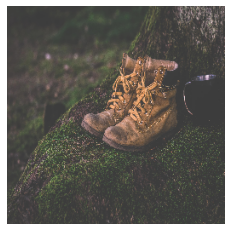

1/1 [==============================] - 0s 49ms/step
[[0.0000000e+00 1.0000000e+00 0.0000000e+00 6.4083297e-35 2.9150821e-20]]
Boat


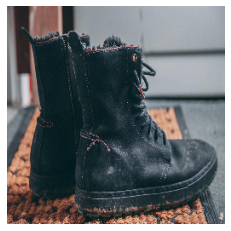

1/1 [==============================] - 0s 45ms/step
[[1. 0. 0. 0. 0.]]
Boat


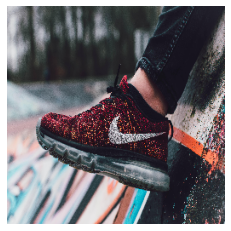

1/1 [==============================] - 0s 45ms/step
[[9.4147480e-26 6.5107958e-04 2.7816241e-06 6.8848592e-01 3.1086022e-01]]
Sneaker


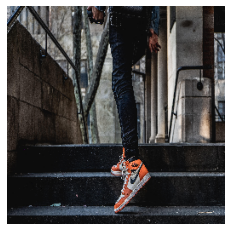

1/1 [==============================] - 0s 45ms/step
[[0. 0. 0. 1. 0.]]
Sneaker


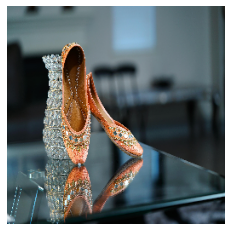

1/1 [==============================] - 0s 48ms/step
[[1. 0. 0. 0. 0.]]
Boat


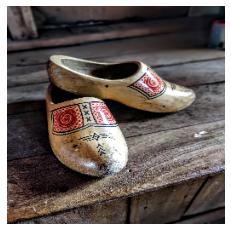

1/1 [==============================] - 0s 45ms/step
[[1. 0. 0. 0. 0.]]
Boat


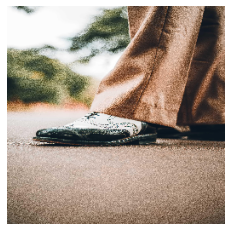

1/1 [==============================] - 0s 46ms/step
[[2.9854652e-34 0.0000000e+00 0.0000000e+00 1.0000000e+00 1.8503929e-12]]
Sneaker


In [ ]:
# Mengambil gambar yang sudah di download
for url_inf in [    
    '/content/image_inf_1.jpeg',    
    '/content/image_inf_2.jpeg',    
    '/content/image_inf_3.jpeg',    
    '/content/image_inf_4.jpeg',
    '/content/image_inf_5.jpeg',
    '/content/image_inf_6.jpeg',
    '/content/image_inf_7.jpeg'    ]:
  img = load_img(url_inf, target_size=(256, 256))
  plt.imshow(img)
  plt.axis('Off')
  plt.show()
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0) 

# Prefiksi dengan model yang sudah di training
  images = np.vstack([x])
  classes = model_eff_adam.predict(images)
  highest_num = np.argmax(classes)
  print(classes) 
  if classes[0][0].round() == highest_num:
    print('Ballet Flat')
  elif classes[0][1].round() == highest_num:
    print('Boat')
  elif classes[0][2].round() == highest_num:
    print('Brogue')
  elif classes[0][3].round() == highest_num:
    print('Clog')
  else:
    print('Sneaker')

<center>Akhir Bagian 8</center>
<hr>
<hr>

# IX. Pengambilan Kesimpulan

Model prediksi sudah dapat digunakan dengan akurasi melebihi 8. Namun setelah dicoba dimasukan data inference, model training tanpa improvement/tuning lebih beragam pada hasilnya. Beberapa saran untuk dataset ini:
<br>
1. Foto-foto yang tersedia ada yang tidak berfokus kepada sepatu.
2. Peletakan sepatu lebih banyak warna sepatunya dari pada sepatu dari berbagai sisi, hal ini akan menyulitkan model training dalam mengetahui hal-hal dasar pada jenis sepatu.
3. Terdapat beberapa foto sepatu dalam jumlah yang banyak, hal ini juga menyulitkan model training

Model training ini bisa dijadikan alat yang membantu dalam menyortir inventori sepatu, menambah customer experience dengan menambah produk pelayanan berupa pencarian jenis sepatu yang customer foto, dan menambah algoritma computer vision lainnya seperti algoritma pendeteksi bahan sepatu.

<center>Akhir file ipynb ini</center>
<hr>
<hr>